In [37]:
import torch
print(torch.__version__)

2.3.1


我们先讨论使用y=wx这个简单的线性模型。使用穷举法，求出Cost Function关于权重w的关系和图像。

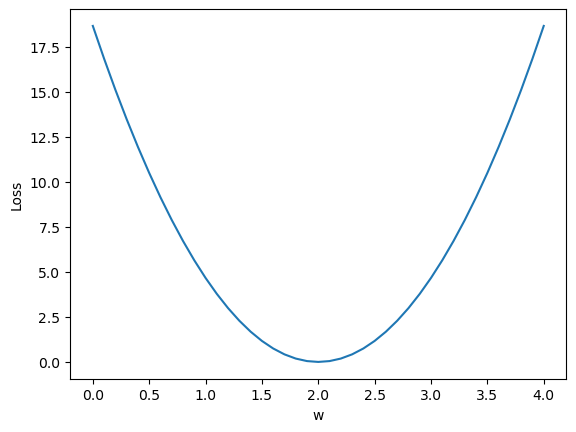

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)**2

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    #print('w=',w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val,y_val)
        l_sum +=loss_val
        #print('\t',x_val,y_val, y_pred_val,loss_val)
    #print('MSE=', l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

有了上面的基础，现在讨论一下model: y = wx+b ，这时，除了有权重w，还有一个bias b，所以Cost function的图像应该是一个三维的，w，b为自变量的曲面。

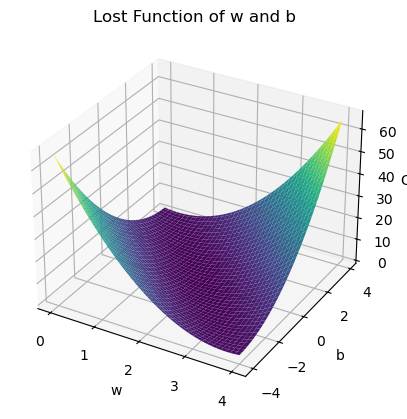

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#data set
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

#define a model
def forward(x):
    return x*w+b

#define a loss function
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

# range and step of w and b

w_range = np.arange(0.0, 4.1, 0.1)
b_range = np.arange(-4.0,4.0, 0.1)

#initialation value
#将w，b网格化
W,B = np.meshgrid(w_range,b_range)
#创建一个和W相同的全0数组
MSE = np.zeros_like(W)

#build the cost function
for i,w in enumerate(w_range):
    for j,b in enumerate(b_range):
        #print('w=',w)
        #print('b=',b)
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            y_pred_val = forward(x_val)
            loss_val = loss(x_val,y_val)
            l_sum +=loss_val
            MSE[j,i] = l_sum / len(x_data)
            #print('\t',x_val,y_val, y_pred_val,loss_val)
        #print('MSE=', l_sum/3)

#Creating a 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#drawing 3D graphics
ax.plot_surface(W, B, MSE, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Lost Function of w and b')

plt.show()

然而在实际的应用中，采用穷举法并不能解决问题，一方面是无法找到Cost Function的globa minimum，而且随着权重的变多，形成的cost图像也不只是一个凸函数，给最小值的寻找带来了很多问题。
这时我们就引入了Gradient Descent梯度下降法来求得Cost Function的最小值。在深度学习默认的梯度下降法，我们都采用的是mini-batch的算法进行随机梯度下降。用这样的方法克服鞍点所带来的问题。

这里先以y=wx为例，引入梯度下降法 $ \omega = \omega - \alpha\frac{\partial cost}{\partial \omega} $ 得出

$$
\omega = \omega - \alpha \frac{1}{N}\sum_{n=1}^N 2\cdot x_n \cdot (x_n \cdot \omega - y_n)
$$

Predict (before traning) 4 4.0
Predict(after training) 4 7.999777758621207


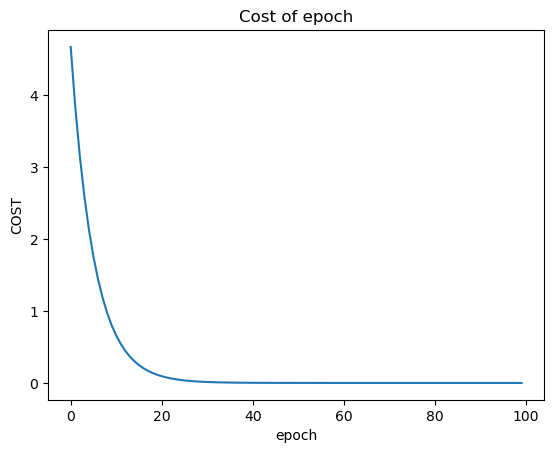

In [40]:
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w=1.0

# model defination
def forward(x):
    return x*w

def cost(xs,ys):
    cost = 0
    for x,y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred - y)**2
    return cost / len(xs)
    
def gradient(xs,ys):
    grad = 0
    for x,y in zip(xs,ys):
        grad += 2*x*(x*w - y)
    return grad/len(xs)

cost_value = []

print('Predict (before traning)',4,forward(4))
for epoch in range(100):
    cost_val = cost(x_data,y_data)
    grad_val = gradient(x_data,y_data)
    w -=0.01*grad_val
    cost_value.append(cost_val)
    #print('Epoch',epoch, 'w=',w, cost_val)
print('Predict(after training)',4,forward(4))

plt.plot(range(100),cost_value)
plt.xlabel('epoch')
plt.ylabel('COST')
plt.title('Cost of epoch')
plt.show()



    

从上面的例子可以看出，引入梯度下降法后，我们就可以通过代码实现Cost Function最小值的自动寻找。

这种方法适用于凸函数，并且没有鞍点的模型。一旦函数处于鞍点，也就是处于梯度为0的点，会导致梯度下降算法无法继续。为了克服这一问题，人们引入随机梯度下降算法。

梯度下降算法是将所有Loss的和加起来再平均的结果进行梯度计算。 在随机梯度下降中，我们只随机的挑选一个Loss进行梯度计算。

如下所示,从 $ \omega = \omega - \alpha\frac{\partial cost}{\partial \omega} $ 到 $ \omega = \omega - \alpha\frac{\partial loss}{\partial \omega} $ 

其中：
$ \frac{\partial cost}{\partial \omega} = \frac{1}{N}\sum_{n=1}^N 2\cdot x_n \cdot (x_n \cdot \omega - y_n)$ 

$ \frac{\partial loss_n}{\partial \omega} = 2\cdot x_n \cdot (x_n \cdot \omega - y_n)$ 


而原先的梯度下降计算公式：
$$
\omega = \omega - \alpha \frac{1}{N}\sum_{n=1}^N 2\cdot x_n \cdot (x_n \cdot \omega - y_n)
$$
也变成了：
$$
\omega = \omega - \alpha \cdot 2\cdot x_n \cdot (x_n \cdot \omega - y_n)
$$


Predict before training 4 4.0
Predict (after Training) 4 7.9999999999996945


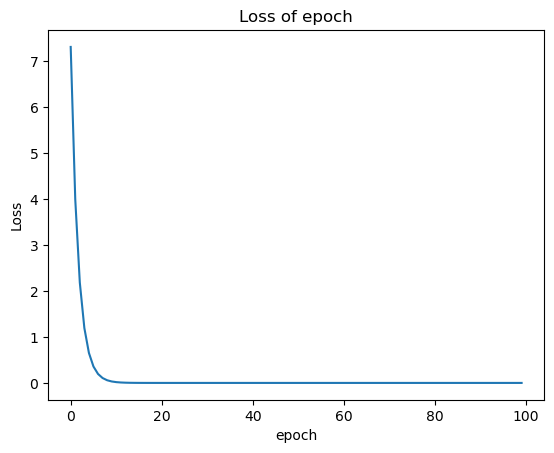

In [41]:
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w=1.0

def forward(x):
    return x*w 

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

def gradient(x,y):
    return 2*x*(x*w-y)

loss_value = []

print('Predict before training' ,4 , forward(4))

for epoch in range(100):
    for x,y in zip (x_data,y_data):
        grad = gradient(x,y)
        l = loss(x,y)
        w -= 0.01*grad
        #print("\t grad",x,y,grad)
    loss_value.append(l)
    
    #print("Progress",epoch,'w=',w,"loss=",l)

print('Predict (after Training)', 4, forward(4))

plt.plot(range(100),loss_value)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss of epoch')
plt.show()



    

如上所示，采用了随机梯度下降后，我们也得到了一个更成功的预测（相比梯度下降算法），但是这种计算过程是串行计算的（梯度下降是并行），需要计算每个点的gradient，然后再更新w的值以此类推，通常情况下会消耗更久的时间。为了折中两种方法，采用批量梯度计算（BGD，Batch Gradient Descent），而不是每个数据，称为。如今默认采用的随机梯度下降SGD算法就是用的Batch，然而Batch指的是整个data set，而我们这里只是一个小的dataset，也称为mini-Batch。
mini-batch 计算效率更高，收敛速度更快，适用于大数据集，而且引入了噪声，帮助跳出局部最优解，向全局最优解收敛。

<font size ="3">**随着模型复杂度的提高以及对效率的高要求，人们引入方向传播来计算梯度，通过链式法则，避免了重复计算，一次前向传播和一次反向传播即可计算出所有参数的梯度。**

<p>&nbsp;&nbsp;&nbsp;&nbsp;梯度下降：是一种优化算法，目的是通过迭代更新参数来最小化损失函数。<p>

<p>&nbsp;&nbsp;&nbsp;&nbsp;反向传播：是一种计算梯度的方法，目的是有效地计算神经网络中每个参数的梯度。<p>

反向传播（Backpropagation）是一种用于训练神经网络的算法。它是通过计算损失函数的梯度并将其传播回去，以更新神经网络中的权重和偏置，从而最小化损失函数。反向传播是梯度下降的一种具体实现，它在神经网络的训练过程中发挥了重要作用。

*反向传播的优点

<p> &nbsp;&nbsp;&nbsp;&nbsp;高效：通过链式法则，反向传播可以有效地计算每个参数的梯度。<p>

<p> &nbsp;&nbsp;&nbsp;&nbsp;通用：适用于各种类型的神经网络结构。 <p>

<p> &nbsp;&nbsp;&nbsp;&nbsp;自动化：大多数深度学习框架（如 TensorFlow、PyTorch 等）都提供了自动求导和反向传播功能，使得实现复杂神经网络变得更加容易。 <p>

*反向传播的局限性

<p>&nbsp;&nbsp;&nbsp;&nbsp;    局部最优：在非凸损失函数上，可能会陷入局部最优解。<p>

<p>&nbsp;&nbsp;&nbsp;&nbsp;    梯度消失：在深层网络中，梯度可能会在反向传播过程中逐渐消失，导致训练效率低下。<p>
    

    

Predict (befor training) 4 4.0
Predict (after training) 4 7.999998569488525


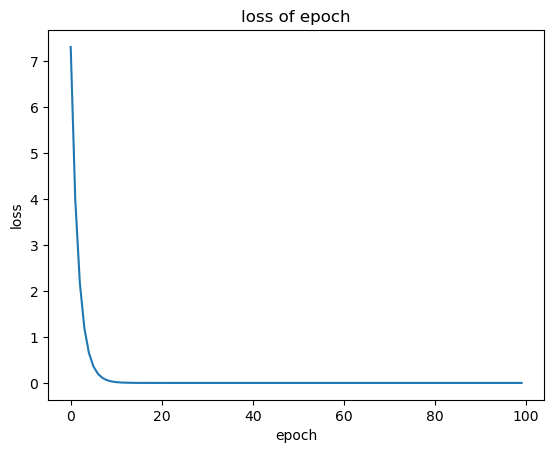

In [42]:
import torch
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = torch.tensor([1.0])
w.requires_grad = True

#w is tensor， when x times w, x will be automatically converted to tensor
def forward(x):
    return w*x 

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

loss_value = []

#x is tensor, we need use item() to take the scaler.
print('Predict (befor training)', 4, forward(4).item())

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l = loss(x,y)
        #   Calculate in order to get the gradients of all parameters (here only w) on the computational path of 
        #   l and store them in the corresponding tensor, e.g., the gradient of w is represented as w.grad
        l.backward()
        #print('\tgrad:',x,y,w.grad.item())
        w.data = w.data - 0.01*w.grad.data

        #clear the gradient value
        w.grad.data.zero_()
    loss_value.append(l.item())
    #print('Progress:',epoch, l.item())
print("Predict (after training)",4,forward(4).item())

plt.plot(range(100),loss_value)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss of epoch')
plt.show()



    